In [100]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
import lib_eval as eval
import pickle as pk
import pandas as pd
import numpy as np
from numpy import *
import time
import matplotlib.pyplot as plt
from tqdm import *
from pylab import *
from multiprocessing import Pool
import pickle
from datetime import datetime
import os
import statsmodels.api as sm
import julian
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.interpolate import griddata
from scipy.signal import medfilt
import copy
from scipy.stats import multivariate_normal as mn
nasa_julian = 98
cnes_julian = 90
import os
os.environ['PROJ_LIB']= "C:\\Users\\vankh\\Anaconda3\\Lib\\site-packages\\mpl_toolkits\\basemap"
from mpl_toolkits.basemap import Basemap

## I. Predict surface temperature and salanity in the Gulf Stream region (pressure < 100)


In [4]:
# Load coordinates, dates
coords_g_train =  pd.read_pickle('data/GS-p_100/feature_train_gs_100.pkl')
x_g_train = pd.read_pickle('data/GS-p_100/x_train_gs_100.pkl')
x_g_test = pd.read_pickle('data/GS-p_100/x_test_gs_100.pkl')
lat_train, lon_train, juld_train = coords_g_train[:,0],coords_g_train[:,1],coords_g_train[:,2]
pres_train = x_g_train[:,-1]
coords_g_test =  pd.read_pickle('data/GS-p_100/feature_test_gs_100.pkl')
lat_test, lon_test, juld_test = coords_g_test[:,0],coords_g_test[:,1],coords_g_test[:,2]
pres_test = coords_g_test[:,-1]
map = Basemap(projection='merc',llcrnrlat=30,urcrnrlat=50,llcrnrlon=-75,urcrnrlon=-36,resolution='c')

In [5]:
# Ground truth surface salanity
gt_sal_train = pd.read_pickle('data/GS-p_100/y_train_gs_100.pkl')[:,1]
gt_sal_test = pd.read_pickle('data/GS-p_100/y_test_gs_100.pkl')[:,1]

In [6]:
# Ground truth surface temperature
gt_temp_train = pd.read_pickle('data/GS-p_100/y_train_gs_100.pkl')[:,0]
gt_temp_test = pd.read_pickle('data/GS-p_100/y_test_gs_100.pkl')[:,0]

In [7]:
# Estimated surface salanity
est_sal_train = np.loadtxt('trained-model/GS-p_100/y_h_train_E3_5.txt')
est_sal_test = np.loadtxt('trained-model/GS-p_100/y_h_test_E3_5.txt')

In [8]:
# Estimated surface temperature
est_temp_train = np.loadtxt('trained-model/GS-p_100/y_h_train_E1_5.txt')
est_temp_test = np.loadtxt('trained-model/GS-p_100/y_h_test_E1_5.txt')

In [9]:
# Residual plot of salanity
residual_sal_train = est_sal_train-gt_sal_train
residual_sal_test = est_sal_test-gt_sal_test

In [10]:
# Residual plot of temperature
residual_temp_train = est_temp_train-gt_temp_train
residual_temp_test = est_temp_test-gt_temp_test

In [11]:
#### Dominant mode for each profile on the maps
pi_hat_train_sal = np.loadtxt('trained-model/GS-p_100/pi_h_train_E3_5.txt')
pi_hat_test_sal = np.loadtxt('trained-model/GS-p_100/pi_h_test_E3_5.txt')

In [12]:
#### Dominant mode for each profile on the maps
pi_hat_train_temp = np.loadtxt('trained-model/GS-p_100/pi_h_train_E1_5.txt')
pi_hat_test_temp = np.loadtxt('trained-model/GS-p_100/pi_h_test_E1_5.txt')

In [11]:
press_g_train = x_g_train[:,-1]
lev_limit = 2
press_mask = np.where(press_g_train < lev_limit)[0]
press_lon_train = lon_train[press_mask]
press_lat_train = lat_train[press_mask]
press_pi_h_train_temp = pi_hat_train_temp[press_mask]

In [12]:
press_pi_h_train_temp[:,-1]

array([4.97290431e-10, 2.15637505e-01, 3.82381540e-06, ...,
       2.05516940e-11, 1.95853844e-01, 3.08139046e-04])

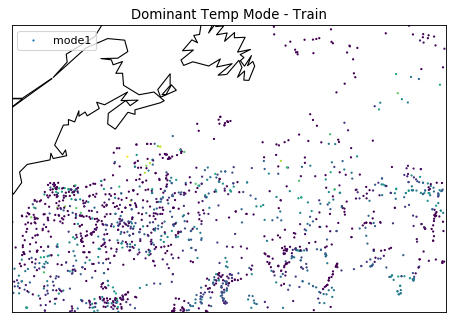

In [21]:
figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
eval.mode(press_lon_train, press_lat_train,map, press_pi_h_train_temp[:,0], 0, combine = False ,subplot = 224, title = "Dominant Temp Mode - Train")

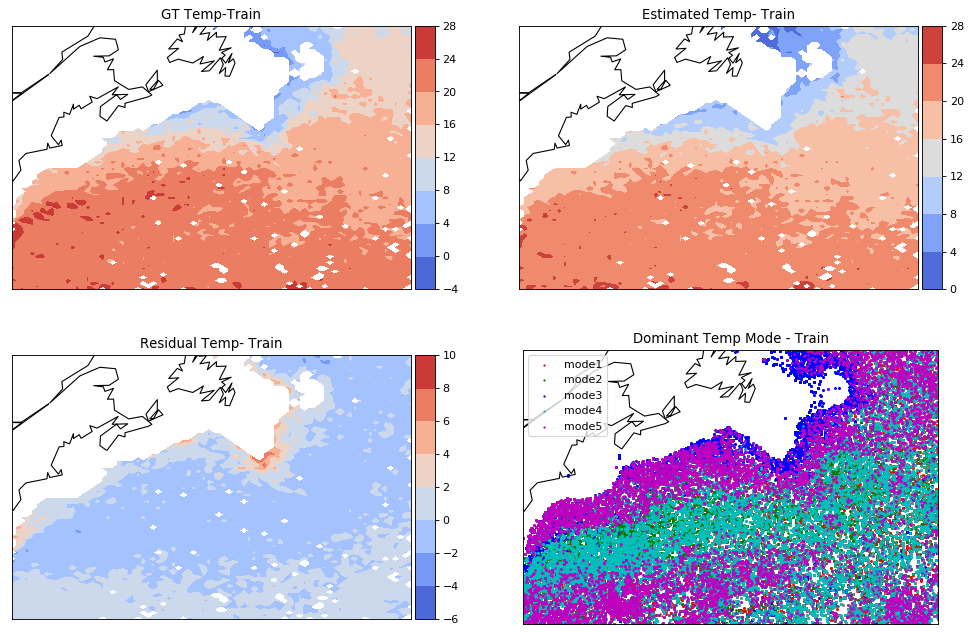

In [27]:
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
eval.pcolor_surface(lon_train, lat_train, 80, 80, map, gt_temp_train, title = 'GT Temp-Train', combine = True ,subplot = 221)
eval.pcolor_surface(lon_train, lat_train, 80, 80, map, est_temp_train, title = 'Estimated Temp- Train', combine = True ,subplot = 222)
eval.pcolor_surface(lon_train, lat_train, 80, 80, map, residual_temp_train, title = 'Residual Temp- Train', combine = True ,subplot = 223)
eval.mode_dist(lon_train, lat_train,map, pi_hat_train_temp, combine = True ,subplot = 224, title = "Dominant Temp Mode - Train")

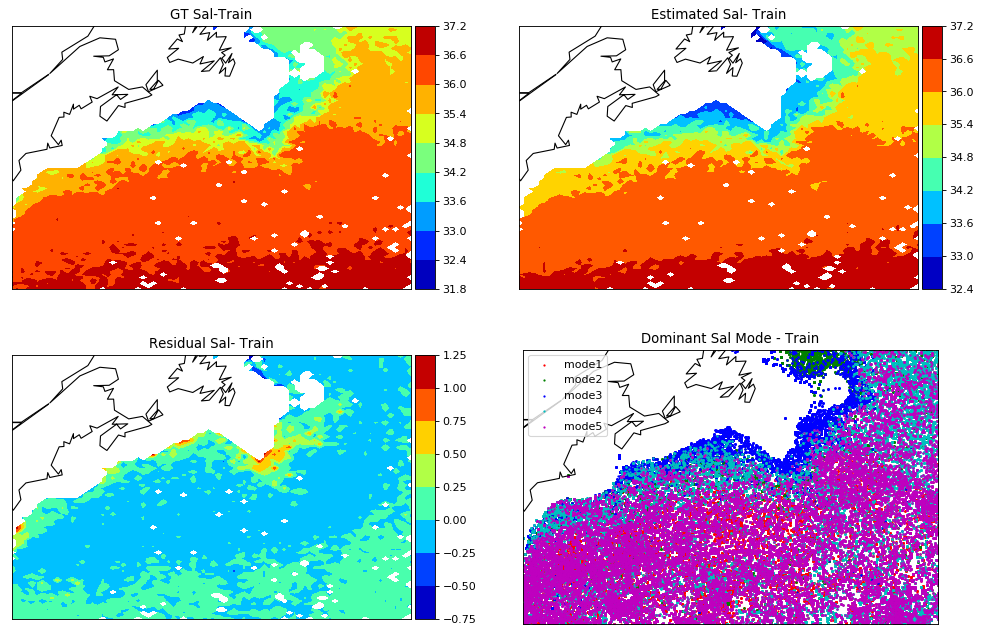

In [28]:
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
eval.pcolor_surface(lon_train, lat_train, 80, 80, map, gt_sal_train, title = 'GT Sal-Train', combine = True ,subplot = 221, cmap_temp = False)
eval.pcolor_surface(lon_train, lat_train, 80, 80, map, est_sal_train, title = 'Estimated Sal- Train', combine = True ,subplot = 222, cmap_temp = False)
eval.pcolor_surface(lon_train, lat_train, 80, 80, map, residual_sal_train, title = 'Residual Sal- Train', combine = True ,subplot = 223, cmap_temp = False)
eval.mode_dist(lon_train, lat_train,map, pi_hat_train_sal, combine = True ,subplot = 224, title = "Dominant Sal Mode - Train")

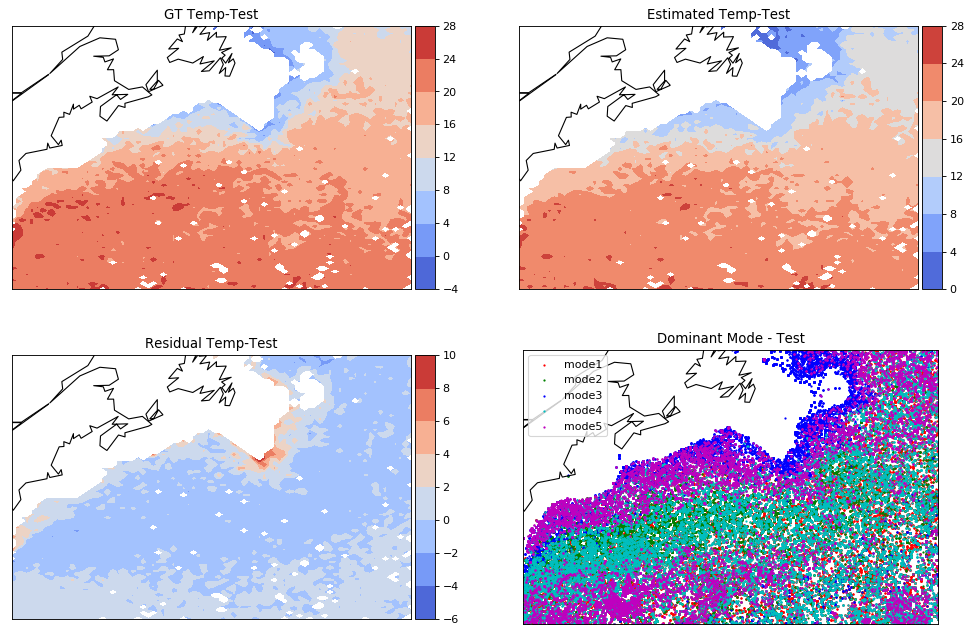

In [29]:
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
eval.pcolor_surface(lon_test, lat_test, 80, 80, map, gt_temp_test, title = 'GT Temp-Test', combine = True ,subplot = 221)
eval.pcolor_surface(lon_test, lat_test, 80, 80, map, est_temp_test, title = 'Estimated Temp-Test', combine = True ,subplot = 222)
eval.pcolor_surface(lon_test, lat_test, 80, 80, map, residual_temp_test, title = 'Residual Temp-Test', combine = True ,subplot = 223)
eval.mode_dist(lon_test, lat_test,map, pi_hat_test_temp, combine = True ,subplot = 224, title = "Dominant Mode - Test")

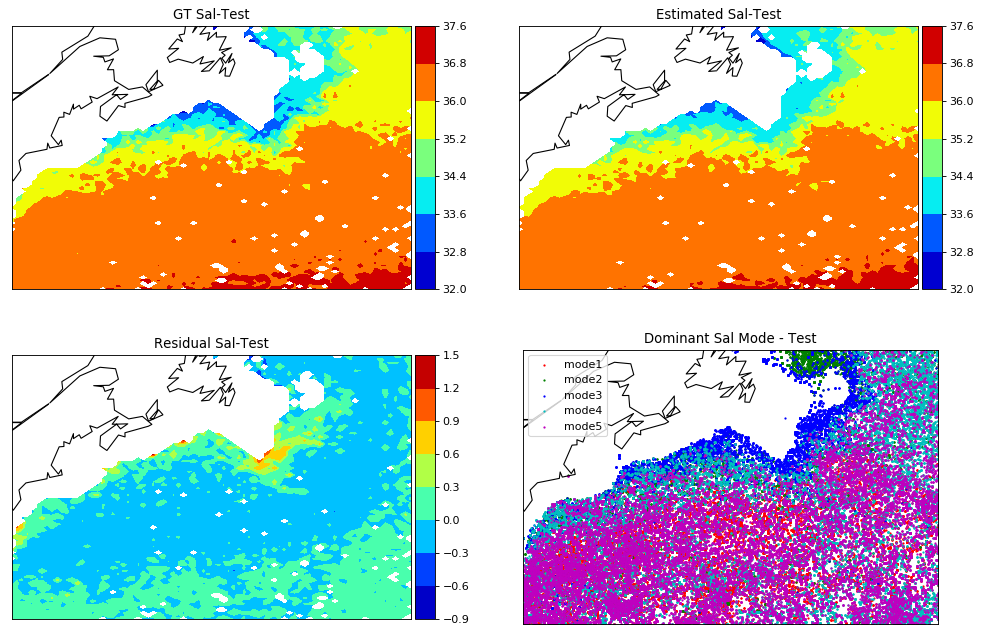

In [30]:
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
eval.pcolor_surface(lon_test, lat_test, 80, 80, map, gt_sal_test, title = 'GT Sal-Test', combine = True ,subplot = 221,  cmap_temp = False)
eval.pcolor_surface(lon_test, lat_test, 80, 80, map, est_sal_test, title = 'Estimated Sal-Test', combine = True ,subplot = 222,  cmap_temp = False)
eval.pcolor_surface(lon_test, lat_test, 80, 80, map, residual_sal_test, title = 'Residual Sal-Test', combine = True ,subplot = 223,  cmap_temp = False)
eval.mode_dist(lon_test, lat_test,map, pi_hat_test_sal, combine = True ,subplot = 224, title = "Dominant Sal Mode - Test")

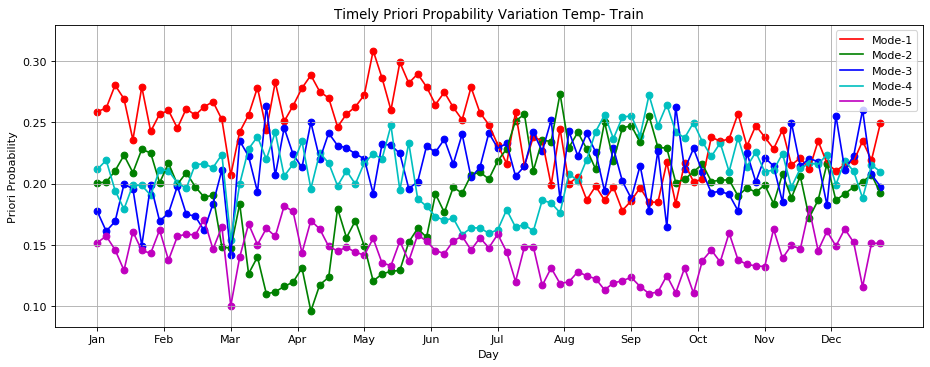

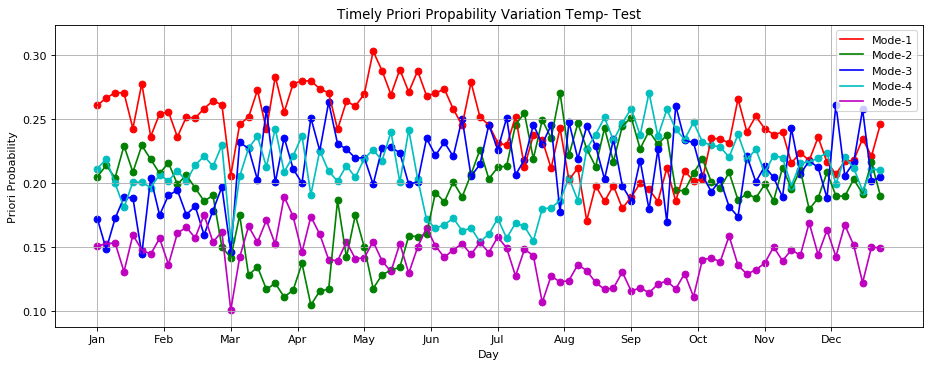

In [13]:
# Plot the prorior mode probabilities varying in time
eval.prior_prob_time_plot(pi_hat_train_temp,juld_train, 5,4,title = "Timely Priori Propability Variation Temp- Train", figx =14, figy = 5)
eval.prior_prob_time_plot(pi_hat_test_temp,juld_test, 5,4,title = "Timely Priori Propability Variation Temp- Test", figx =14, figy = 5)

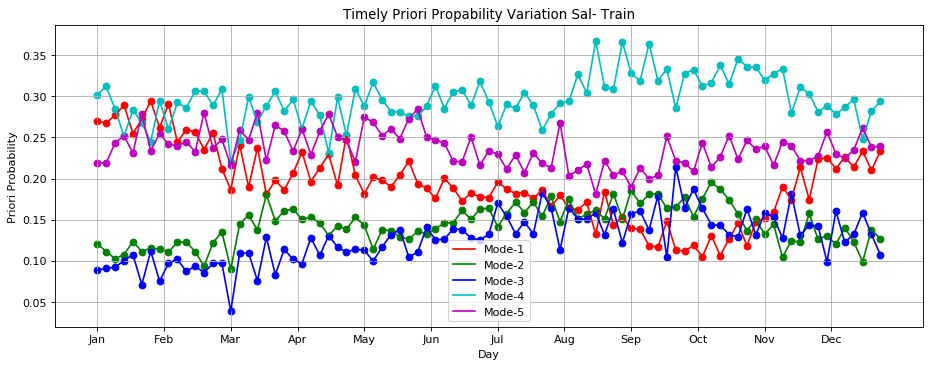

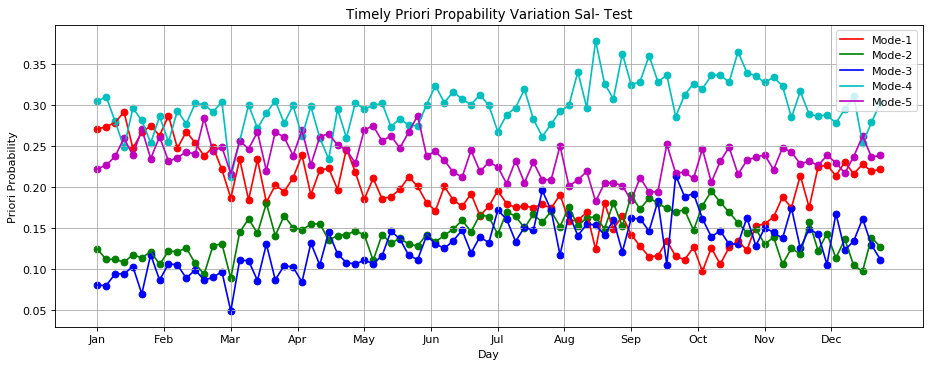

In [12]:
# Plot the prorior mode probabilities varying in time
eval.prior_prob_time_plot(pi_hat_train_sal,juld_train, 5,4,title = "Timely Priori Propability Variation Sal- Train", figx =14, figy = 5)
eval.prior_prob_time_plot(pi_hat_test_sal,juld_test, 5,4,title = "Timely Priori Propability Variation Sal- Test", figx =14, figy = 5)

In [14]:
# Following the temperature evolution
X = pd.read_pickle("data/GS-p_100/x_train_gs_100.pkl")
profiles = pd.read_pickle('data/GS-p_100/feature_train_gs_100.pkl')[:,-1]

E1_info = pd.read_pickle("trained-model/GS-p_100/E1_info.pkl")
E1_f_x = E1_info["feature_mean"]
E1_std_x = E1_info["feature_std"]
E1_beta = pd.read_pickle("trained-model/GS-p_100/beta_E1_5.pkl")
E1_lambda_ = pd.read_pickle("trained-model/GS-p_100/lambda_E1_5.pkl")
E1_sigma = pd.read_pickle("trained-model/GS-p_100/sigma_E1_5.pkl")

E3_info = pd.read_pickle("trained-model/GS-p_100/E3_info.pkl")
E3_f_x = E3_info["feature_mean"]
E3_std_x = E3_info["feature_std"]
E3_beta = pd.read_pickle("trained-model/GS-p_100/beta_E3_5.pkl")
E3_lambda_ = pd.read_pickle("trained-model/GS-p_100/lambda_E3_5.pkl")
E3_sigma = pd.read_pickle("trained-model/GS-p_100/sigma_E3_5.pkl")

Coordinates x:  (longtitude= -67.6259994506836,latitude= 31.516000747680664)
Coordinates x:  (longtitude= -67.6259994506836,latitude= 31.516000747680664)


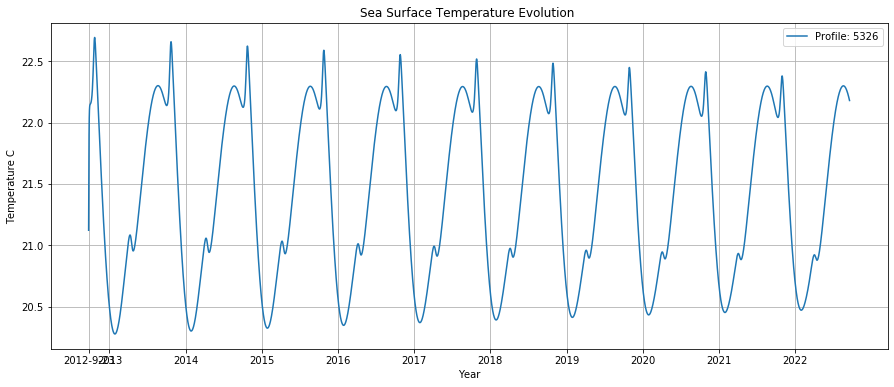

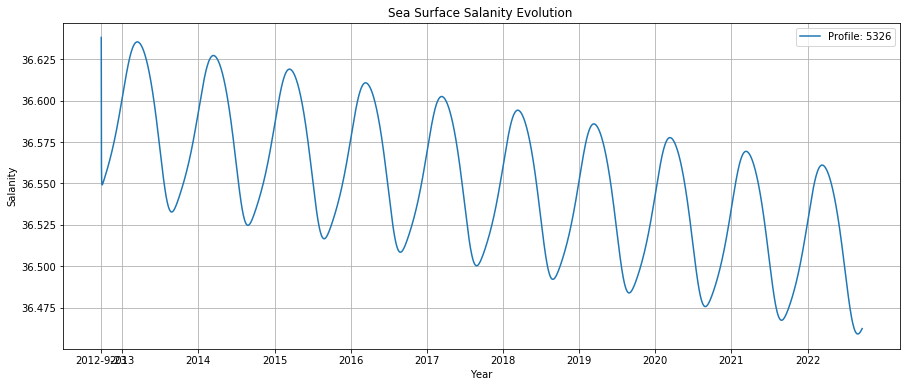

In [15]:
index = 10000
priode_ = 365*10 # days
prof = profiles[index]
days_temp,tempx = eval.follow_x(index,coords_g_train,priode_,X,E1_f_x,E1_std_x, pi_hat_train_temp,E1_beta,E1_lambda_,E1_sigma,gt_temp_train)
days_sal,salx = eval.follow_x(index,coords_g_train,priode_,X,E3_f_x,E3_std_x,pi_hat_train_sal,E3_beta,E3_lambda_,E3_sigma,gt_sal_train)
eval.follow_x_plot(days_temp,tempx,int(prof),step = 1)
eval.follow_x_plot(days_sal,salx,int(prof),step = 1, temp = False)

## II. Predict temperature surface in the KUROSHIO region (pressure < 100, 10% data)

### Load coordinates, dates

In [13]:
# Load coordinates, dates
coords_g_train =  pd.read_pickle('data/KS-p_100-10/feature_train-KS-p_100-10.pkl')
lat_train, lon_train, juld_train = coords_g_train[:,0],coords_g_train[:,1],coords_g_train[:,2]
coords_g_test =  pd.read_pickle('data/KS-p_100-10/feature_test-KS-p_100-10.pkl')
lat_test, lon_test, juld_test = coords_g_test[:,0],coords_g_test[:,1],coords_g_test[:,2]
map = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=45,llcrnrlon=132,urcrnrlon=180,resolution='c')

In [14]:
# Ground truth surface temperature
ks_temp_train = pd.read_pickle('data/KS-p_100-10/y_train-KS-p_100-10.pkl')[:,0]
ks_temp_test = pd.read_pickle('data/KS-p_100-10/y_test-KS-p_100-10.pkl')[:,0]

In [15]:
# Ground truth surface salanity
ks_sal_train = pd.read_pickle('data/KS-p_100-10/y_train-KS-p_100-10.pkl')[:,1]
ks_sal_test = pd.read_pickle('data/KS-p_100-10/y_test-KS-p_100-10.pkl')[:,1]

In [16]:
# Estimated surface temperature
est_temp_train = np.loadtxt('trained-model/KS-p_100-10/y_h_train_E2_5.txt')
est_temp_test = np.loadtxt('trained-model/KS-p_100-10/y_h_test_E2_5.txt')

In [17]:
# Estimated surface temperature
est_sal_train = np.loadtxt('trained-model/KS-p_100-10/y_h_train_E4_5.txt')
est_sal_test = np.loadtxt('trained-model/KS-p_100-10/y_h_test_E4_5.txt')

In [18]:
# Residual plot of temperature
residual_temp_train = est_temp_train-ks_temp_train
residual_temp_test = est_temp_test-ks_temp_test

In [19]:
# Residual plot of temperature
residual_sal_train = est_sal_train-ks_sal_train
residual_sal_test = est_sal_test-ks_sal_test

In [20]:
#### Dominant mode for each profile on the maps
pi_hat_train_temp = np.loadtxt('trained-model/KS-p_100-10/pi_h_train_E2_5.txt')
pi_hat_test_temp = np.loadtxt('trained-model/KS-p_100-10/pi_h_test_E2_5.txt')

In [21]:
#### Dominant mode for each profile on the maps
pi_hat_train_sal = np.loadtxt('trained-model/KS-p_100-10/pi_h_train_E4_5.txt')
pi_hat_test_sal = np.loadtxt('trained-model/KS-p_100-10/pi_h_test_E4_5.txt')

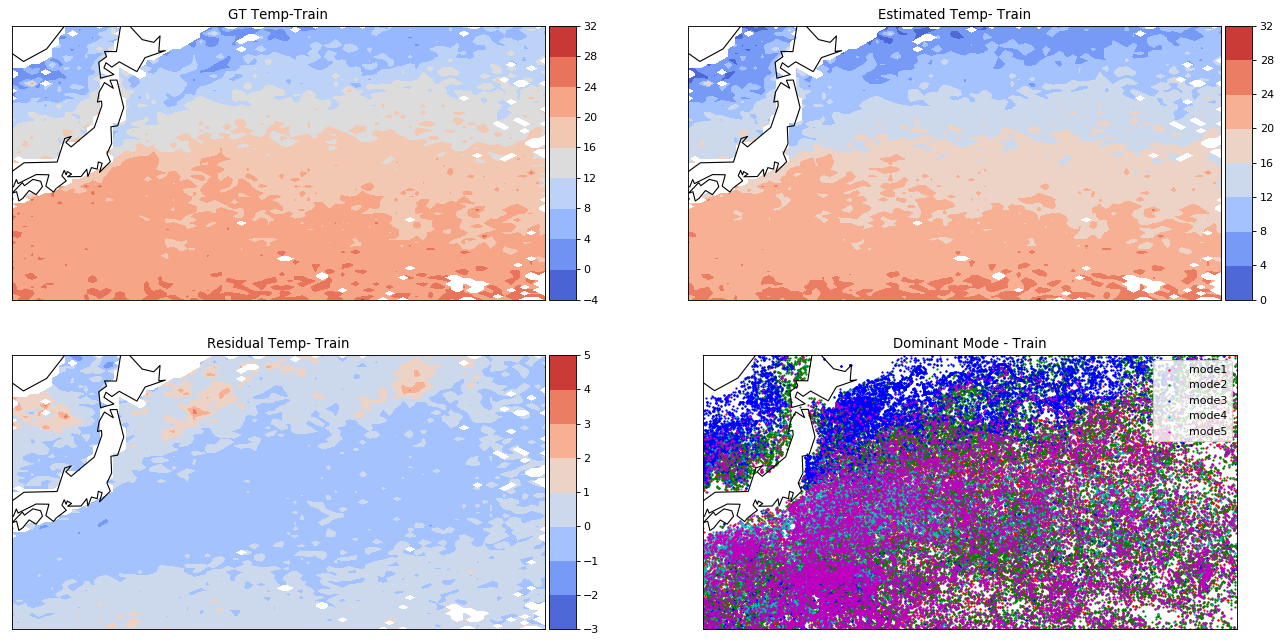

In [12]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
eval.pcolor_surface(lon_train, lat_train, 80, 80, map, ks_temp_train, title = 'GT Temp-Train', combine = True ,subplot = 221)
eval.pcolor_surface(lon_train, lat_train, 80, 80, map, est_temp_train, title = 'Estimated Temp- Train', combine = True ,subplot = 222)
eval.pcolor_surface(lon_train, lat_train, 80, 80, map, residual_temp_train, title = 'Residual Temp- Train', combine = True ,subplot = 223)
eval.mode_dist(lon_train, lat_train,map, pi_hat_train_temp, combine = True ,subplot = 224, title = "Dominant Mode - Train")

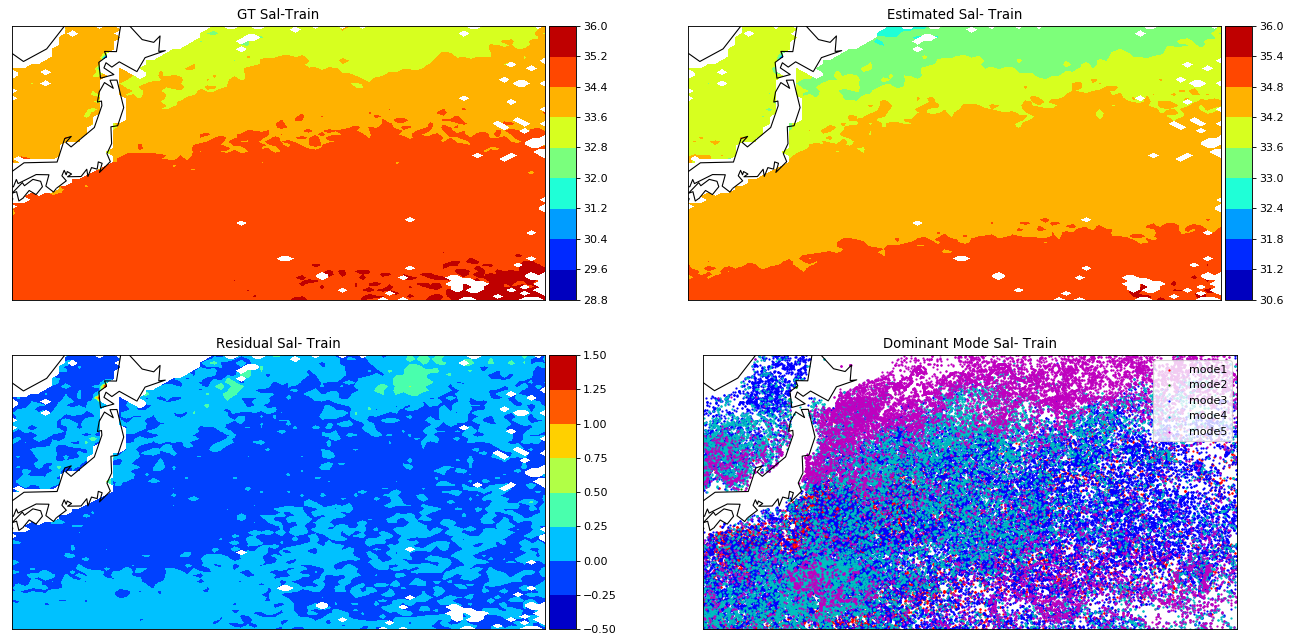

In [13]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
eval.pcolor_surface(lon_train, lat_train, 80, 80, map, ks_sal_train, title = 'GT Sal-Train', combine = True ,subplot = 221,  cmap_temp = False)
eval.pcolor_surface(lon_train, lat_train, 80, 80, map, est_sal_train, title = 'Estimated Sal- Train', combine = True ,subplot = 222,  cmap_temp = False)
eval.pcolor_surface(lon_train, lat_train, 80, 80, map, residual_sal_train, title = 'Residual Sal- Train', combine = True ,subplot = 223,  cmap_temp = False)
eval.mode_dist(lon_train, lat_train,map, pi_hat_train_sal, combine = True ,subplot = 224, title = "Dominant Mode Sal- Train")

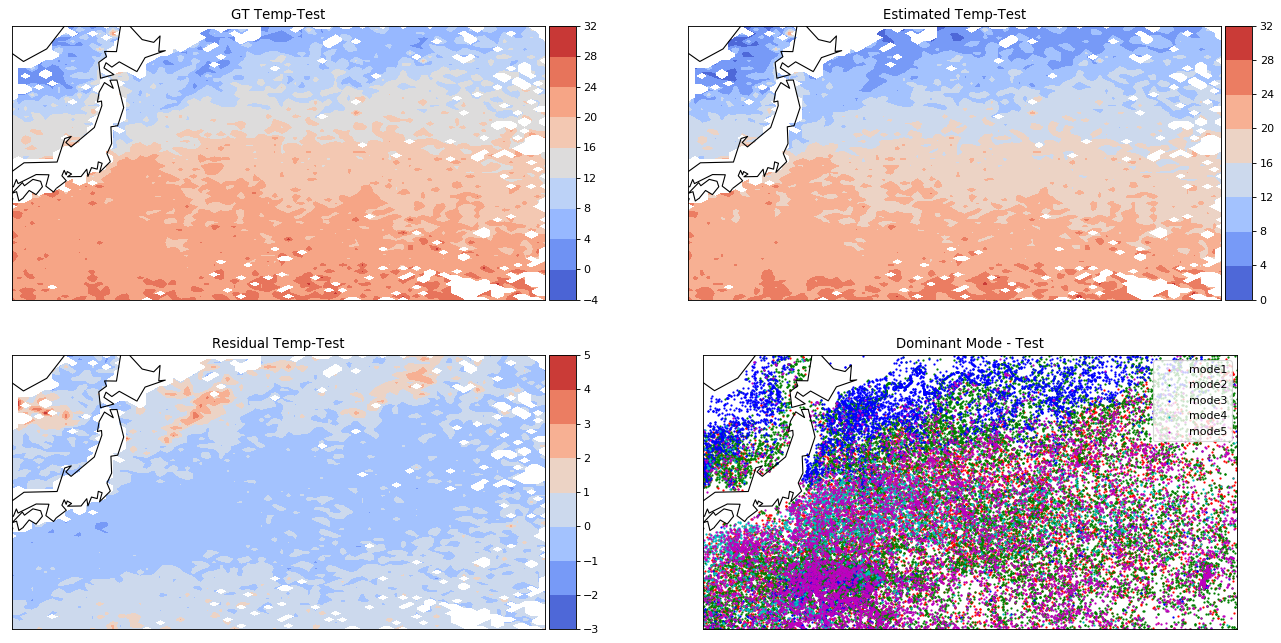

In [14]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
eval.pcolor_surface(lon_test, lat_test, 80, 80, map, ks_temp_test, title = 'GT Temp-Test', combine = True ,subplot = 221)
eval.pcolor_surface(lon_test, lat_test, 80, 80, map, est_temp_test, title = 'Estimated Temp-Test', combine = True ,subplot = 222)
eval.pcolor_surface(lon_test, lat_test, 80, 80, map, residual_temp_test, title = 'Residual Temp-Test', combine = True ,subplot = 223)
eval.mode_dist(lon_test, lat_test,map, pi_hat_test_temp, combine = True ,subplot = 224, title = "Dominant Mode - Test")

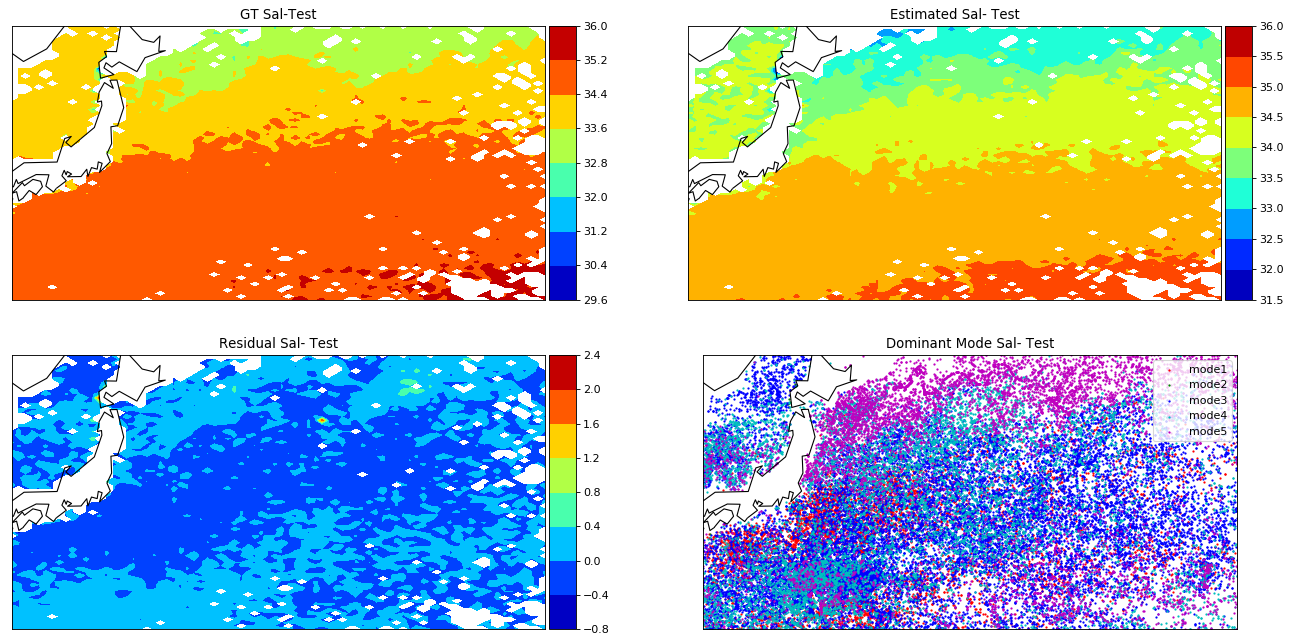

In [15]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
eval.pcolor_surface(lon_test, lat_test, 80, 80, map, ks_sal_test, title = 'GT Sal-Test', combine = True ,subplot = 221,  cmap_temp = False)
eval.pcolor_surface(lon_test, lat_test, 80, 80, map, est_sal_test, title = 'Estimated Sal- Test', combine = True ,subplot = 222,  cmap_temp = False)
eval.pcolor_surface(lon_test, lat_test, 80, 80, map, residual_sal_test, title = 'Residual Sal- Test', combine = True ,subplot = 223,  cmap_temp = False)
eval.mode_dist(lon_test, lat_test,map, pi_hat_test_sal, combine = True ,subplot = 224, title = "Dominant Mode Sal- Test")

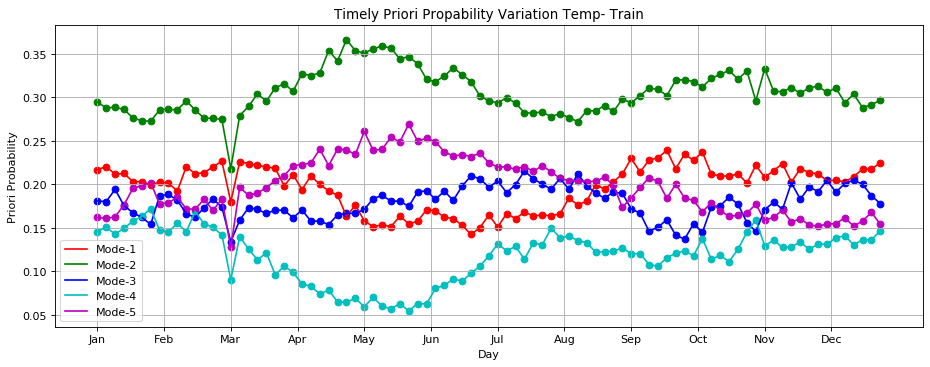

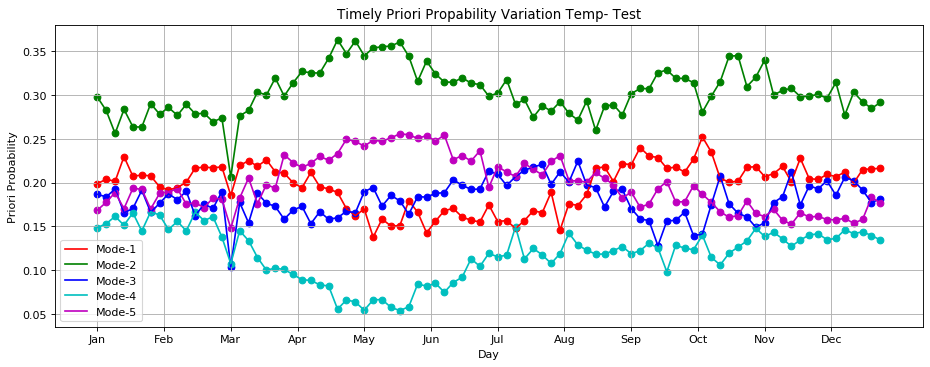

In [22]:
# Plot the prorior mode probabilities varying in time
eval.prior_prob_time_plot(pi_hat_train_temp,juld_train, 5,4,title = "Timely Priori Propability Variation Temp- Train", figx =14, figy = 5)
eval.prior_prob_time_plot(pi_hat_test_temp,juld_test, 5,4,title = "Timely Priori Propability Variation Temp- Test", figx =14, figy = 5)

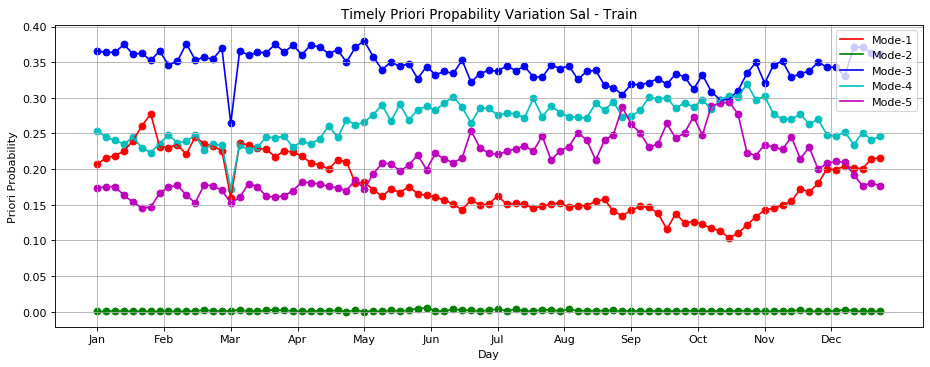

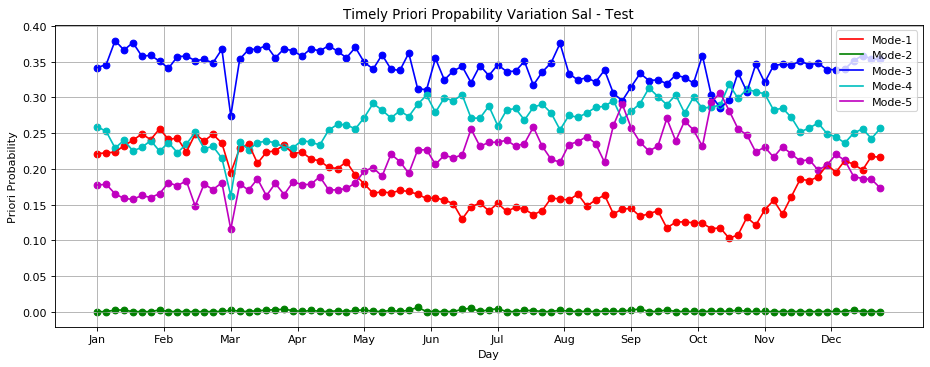

In [23]:
# Plot the prorior mode probabilities varying in time
eval.prior_prob_time_plot(pi_hat_train_sal,juld_train, 5,4,title = "Timely Priori Propability Variation Sal - Train", figx =14, figy = 5)
eval.prior_prob_time_plot(pi_hat_test_sal,juld_test, 5,4,title = "Timely Priori Propability Variation Sal - Test", figx =14, figy = 5)

In [112]:
# Following the temperature evolution
X = pd.read_pickle("data/KS-p_100-10/x_train-KS-p_100-10.pkl")
profiles = pd.read_pickle('data/KS-p_100-10/feature_train-KS-p_100-10.pkl')[:,-1]

E2_info = pd.read_pickle("trained-model/KS-p_100-10/E2_info.pkl")
E2_f_x = E2_info["feature_mean"]
E2_std_x = E2_info["feature_std"]
E2_beta = pd.read_pickle("trained-model/KS-p_100-10/beta_E2_5.pkl")
E2_lambda_ = pd.read_pickle("trained-model/KS-p_100-10/lambda_E2_5.pkl")
E2_sigma = pd.read_pickle("trained-model/KS-p_100-10/sigma_E2_5.pkl")

E4_info = pd.read_pickle("trained-model/KS-p_100-10/E4_info.pkl")
E4_f_x = E4_info["feature_mean"]
E4_std_x = E4_info["feature_std"]
E4_beta = pd.read_pickle("trained-model/KS-p_100-10/beta_E4_5.pkl")
E4_lambda_ = pd.read_pickle("trained-model/KS-p_100-10/lambda_E4_5.pkl")
E4_sigma = pd.read_pickle("trained-model/KS-p_100-10/sigma_E4_5.pkl")

Coordinates x:  (longtitude= 143.53195190429688,latitude= 28.477210998535156)
Coordinates x:  (longtitude= 143.53195190429688,latitude= 28.477210998535156)


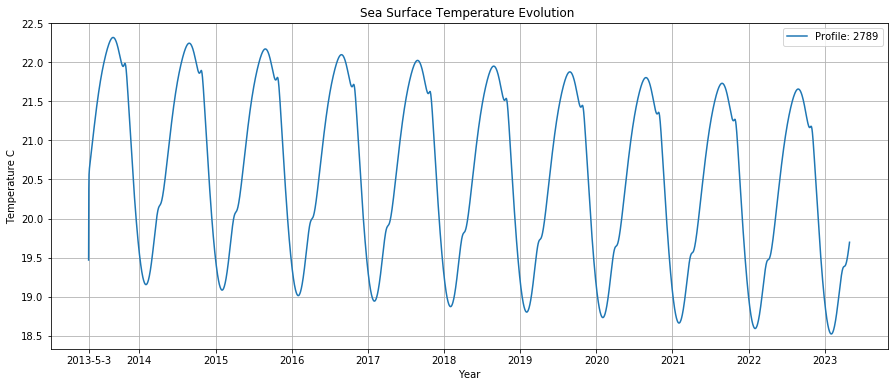

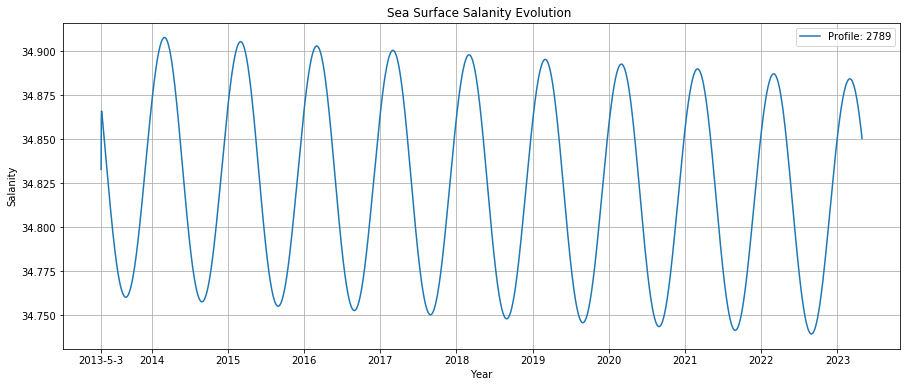

In [19]:
index = 50000
priode_ = 365*10 # days
prof = profiles[index]
day_temp , tempx = eval.follow_x(index,coords_g_train,priode_,X,E2_f_x,E2_std_x,pi_hat_train_temp,E2_beta,E2_lambda_,E2_sigma,ks_temp_train)
day_sal , salx = eval.follow_x(index,coords_g_train,priode_,X,E4_f_x,E4_std_x,pi_hat_train_sal,E4_beta,E4_lambda_,E4_sigma,ks_sal_train)
eval.follow_x_plot(day_temp,tempx,int(prof),step = 1)
eval.follow_x_plot(day_sal,salx,int(prof),step = 1,  temp = False)

### Extract and plot a temperature profile evolution in time

In [82]:
# p =  profiles2[np.random.randint(0,len(profiles2),1)][0]
p = 2468
mask_p = np.where(profiles2.astype(int) == p)
julian_p = julian2[mask_p]
temp_p = gt_temp2[mask_p]
x_p = X2[mask_p,:][0,:,:]

In [164]:
sorted_time_index = np.argsort(julian_p)
sorted_time = julian_p[sorted_time_index]
sorted_temp = temp_p[sorted_time_index]

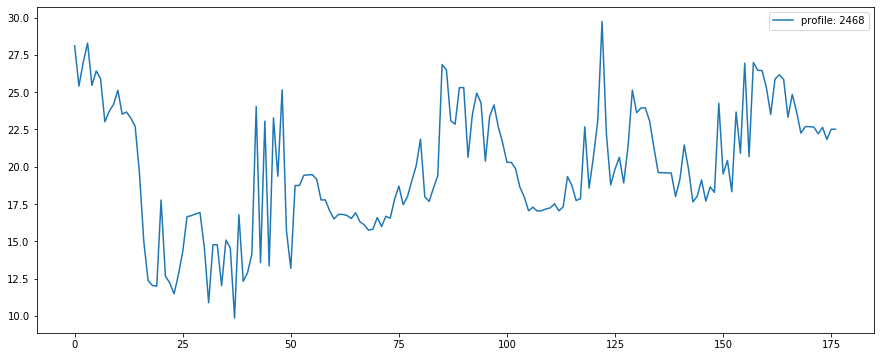

In [165]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.plot(sorted_temp, label = "profile: "+str(int(p)))
plt.legend()
plt.show()

## III. Work on a large dataset extracted to the presure = 1000 in the GulfStream

In [102]:
# Load coordinates, dates
coords_g_train =  pd.read_pickle('data/GS-p_1000/feature_train_GS_1000.pkl')
x_g_train = pd.read_pickle('data/GS-p_1000/x_train_GS_1000.pkl')
lat_train, lon_train, juld_train = coords_g_train[:,0],coords_g_train[:,1],coords_g_train[:,2]
pres_train = x_g_train[:,-1]
coords_g_test =  pd.read_pickle('data/GS-p_1000/feature_test_GS_1000.pkl')
x_g_test = pd.read_pickle('data/GS-p_1000/x_test_GS_1000.pkl')
lat_test, lon_test, juld_test = coords_g_test[:,0],coords_g_test[:,1],coords_g_test[:,2]
pres_test = coords_g_test[:,-1]
map = Basemap(projection='merc',llcrnrlat=30,urcrnrlat=50,llcrnrlon=-75,urcrnrlon=-36,resolution='c')

In [103]:
# Ground truth surface temperature
gt_temp_train = pd.read_pickle('data/GS-p_1000/y_train_GS_1000.pkl')[:,0]
gt_temp_test = pd.read_pickle('data/GS-p_1000/y_test_GS_1000.pkl')[:,0]

In [104]:
# Estimated surface temperature
est_temp_train = np.loadtxt('trained-model/GS-p_1000/y_h_train_E8_8.txt')
est_temp_test = np.loadtxt('trained-model/GS-p_1000/y_h_test_E8_8.txt')

In [105]:
# Residual plot of temperature
residual_temp_train = est_temp_train-gt_temp_train
residual_temp_test = est_temp_test-gt_temp_test

### Spatial temperature representation at diffrent levels of depth

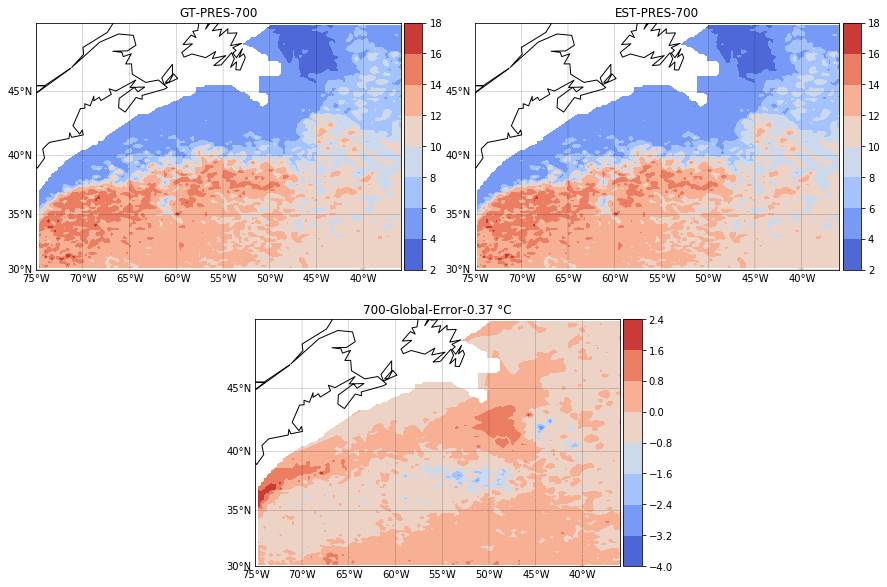

In [106]:
eval.target_predict(lon_train, lat_train, pres_train, 120, 120, map, gt_temp_train, est_temp_train, residual_temp_train, pres_lev = 700, neigboors = 4, cmap_temp = True)

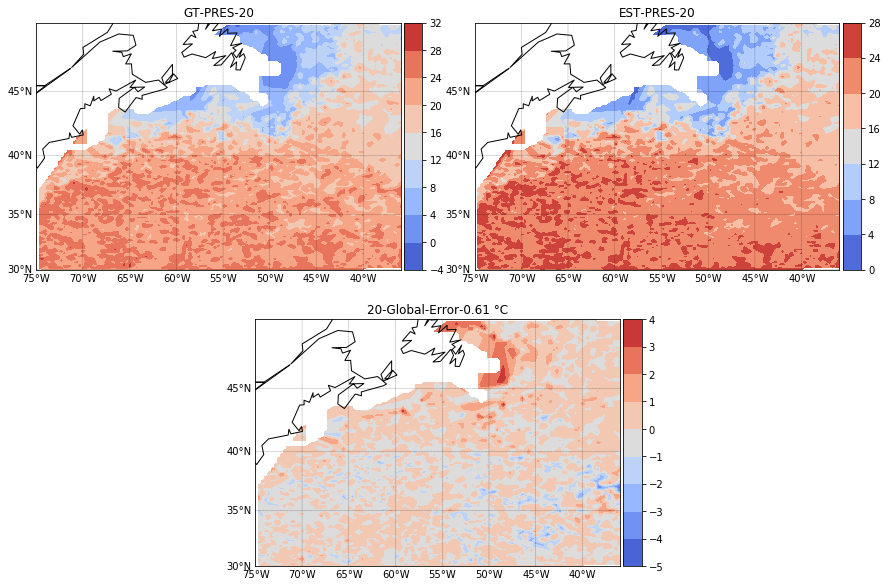

In [7]:
eval.target_predict(lon_train, lat_train, pres_train, 120, 120, map, gt_temp_train, est_temp_train, residual_temp_train, pres_lev = 20, neigboors = 4, cmap_temp = True)

### Seasonal temperature visualization  at severals small local regions

In [107]:
# Following the temperature evolution
X = pd.read_pickle("data/Gs-p_1000/x_train_GS_1000.pkl")
profiles = pd.read_pickle('data/Gs-p_1000/feature_train_GS_1000.pkl')[:,-1]

E8_info = pd.read_pickle("trained-model/Gs-p_1000/E8_info.pkl")
E8_f_x = E8_info["feature_mean"]
E8_std_x = E8_info["feature_std"]
E8_beta = pd.read_pickle("trained-model/Gs-p_1000/beta_E8_8.pkl")
E8_lambda_ = pd.read_pickle("trained-model/Gs-p_1000/lambda_E8_8.pkl")
E8_sigma = pd.read_pickle("trained-model/Gs-p_1000/sigma_E8_8.pkl")

In [108]:
#### Dominant mode for each profile on the maps
pi_hat_train_temp = np.loadtxt('trained-model/GS-p_1000/pi_h_train_E8_8.txt')

In [109]:
p_index = 112491
figure(figsize = (20,13))
eval.sea_temp_plot(p_index,coords_g_train,X, gt_temp_train, est_temp_train,t1 = 1000,t2 = 1000, t3 =50, lat_thres = 3,lon_thres = 3, date_thres = 4745, depth_thres = 10, combine = True ,subplot = 221)
p_index = 399
eval.sea_temp_plot(p_index,coords_g_train,X, gt_temp_train, est_temp_train,t1 = 1000,t2 = 1000, t3 =50, lat_thres = 3,lon_thres = 3, date_thres = 4745, depth_thres = 10, combine = True ,subplot = 222)
p_index = 18
eval.sea_temp_plot(p_index,coords_g_train,X, gt_temp_train, est_temp_train,t1 = 2000,t2 = 2000, t3 =50, lat_thres = 3,lon_thres = 3, date_thres = 4745, depth_thres = 10, combine = True ,subplot = 223)
p_index = 35980
eval.sea_temp_plot(p_index,coords_g_train,X, gt_temp_train, est_temp_train,t1 = 2000,t2 = 2000, t3 =50, lat_thres = 3,lon_thres = 3, date_thres = 4745, depth_thres = 10, combine = True ,subplot = 224)

NameError: name 'index_extract' is not defined

<Figure size 1440x936 with 0 Axes>

In [ ]:
def target_predict(lon, lat, pres, Nlon, Nlat,map, gt_targ, est_targ, error, pres_lev, neigboors, cmap_temp = True):
    """
    target prediction in time and space

    - lat: latitude of the data
    - lon: longitude of the data
    - neigboors: for selecting the interpolated region
    - Nlon: number of point discritizing the longitude
    - Nlat: number of point discritizing the latitude
    - pres_lev: a determined pressure at which we present data ± 15
    """

    # create a 2D coordinate grid
    xlat = np.linspace(min(lat),max(lat),Nlat)
    ylon = np.linspace(min(lon),max(lon),Nlon)

    yylon, xxlat = np.meshgrid(ylon,xlat)
    xxlat = xxlat.reshape(xxlat.shape[0]*xxlat.shape[1],1)
    yylon = yylon.reshape(xxlat.shape[0]*xxlat.shape[1],1)
    zzdepth = pres_lev*np.ones((xxlat.shape[0]*xxlat.shape[1],1))

    # interpolation on the 2D grid at the pressure = pres_lev
    mask_lev = (pres_lev-15 < pres)*(pres < pres_lev + 15)

    lev_pres = pres[mask_lev]
    lev_lat = lat[mask_lev]
    lev_lon = lon[mask_lev]
    lev_gt = gt_targ[mask_lev]
    lev_est = gt_targ[mask_lev]
    lev_error = error[mask_lev]

    N = lev_lon.shape[0]
    features = np.concatenate((lev_lat.reshape(N,1),lev_lon.reshape(N,1),lev_pres.reshape(N,1)),axis = 1)
    points = np.concatenate((xxlat,yylon,zzdepth),axis = 1)

    gt_interpol = griddata(features,lev_gt,points, rescale=True)
    gt_interpol = gt_interpol.reshape(Nlat,Nlon)

    est_interpol = griddata(features,lev_est,points, rescale=True)
    est_interpol = est_interpol.reshape(Nlat,Nlon)

    err_interpol = griddata(features,lev_error,points, rescale=True)
    err_interpol = err_interpol.reshape(Nlat,Nlon)

    err_mean = np.abs(lev_error).mean()

    # select interpolated region where the data exists
    mask_pres = pres < 30
    pres_under_30 = pres[mask_pres]
    lon_30 = lon[mask_pres]
    lat_30 = lat[mask_pres]
    # existing data region mask (care  only about the surface)
    mask_region = np.ones((Nlat,Nlon)) < 2
    for k in range(len(lon_30)):
        i = np.argmin(abs(xlat - lat_30[k]))
        j = np.argmin(abs(ylon - lon_30[k]))
        mask_region[i-neigboors:i+neigboors,j-neigboors:j+neigboors] = False
    # apply the mask
    gt_interpol[mask_region] = nan
    est_interpol[mask_region] = nan
    err_interpol[mask_region] = nan

    if cmap_temp:

        cmap = 'coolwarm'
    else:
        cmap = 'jet'

    plon, plat = map(ylon, xlat)
    xxlon,xxlat = meshgrid(plon,plat)

    parallels = np.arange(0.,81,5.) # lat
    meridians = np.arange(10.,351.,5.) # lon

    fig  = plt.figure(figsize = (15,10))
    subplots_adjust(wspace = 0.1, hspace = 0.2)

    ax1 = fig.add_subplot(221)
    map.contourf(xxlon, xxlat, gt_interpol, cmap = cmap)
    plt.title("GT-PRES-%.f"%pres_lev)
    map.drawcoastlines()
    map.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.3);
    map.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.3);
    divider = make_axes_locatable(ax1)
    cax1 = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(cax=cax1)

    ax2 = fig.add_subplot(222)
    map.contourf(xxlon, xxlat, est_interpol, cmap = cmap)
    plt.title("EST-PRES-%.f"%pres_lev)
    map.drawcoastlines()
    map.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.3);
    map.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.3);
    divider = make_axes_locatable(ax2)
    cax2 = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(cax=cax2)

    ax3 = subplot2grid((2,8), (1, 2), colspan=4)
    map.contourf(xxlon, xxlat, err_interpol, cmap = cmap)
    plt.title("%.f-Global-Error-%.2f °C"%(pres_lev,err_mean))
    map.drawcoastlines()
    map.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.3);
    map.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.3);
    divider = make_axes_locatable(ax3)
    cax3 = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(cax=cax3)

### Spatial dynamical mode representation at different  depth levels

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:11<00:00,  1.41s/it]


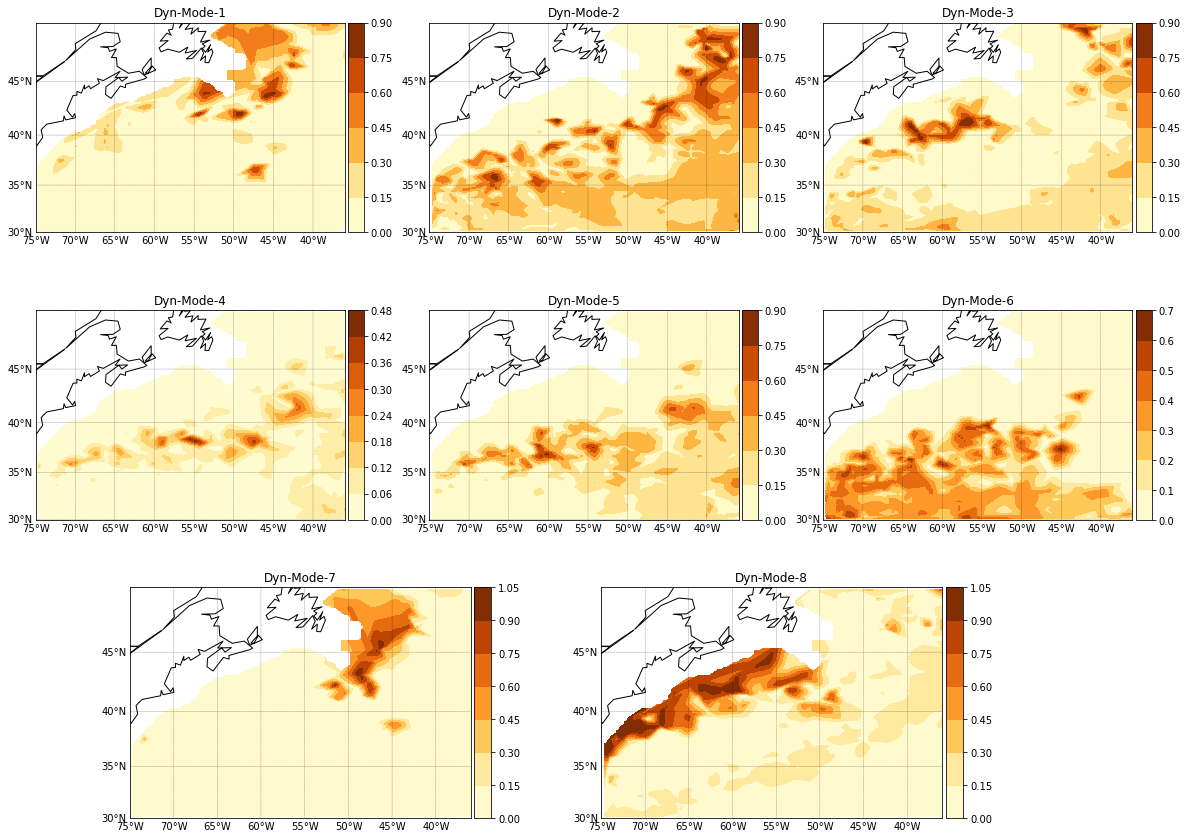

In [99]:
eval.spa_dyna_mode_dis(pi_hat_train_temp, lon_train, lat_train, 120, 120, pres_train, 200 , 300, 250, 3, map)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:11<00:00,  1.39s/it]


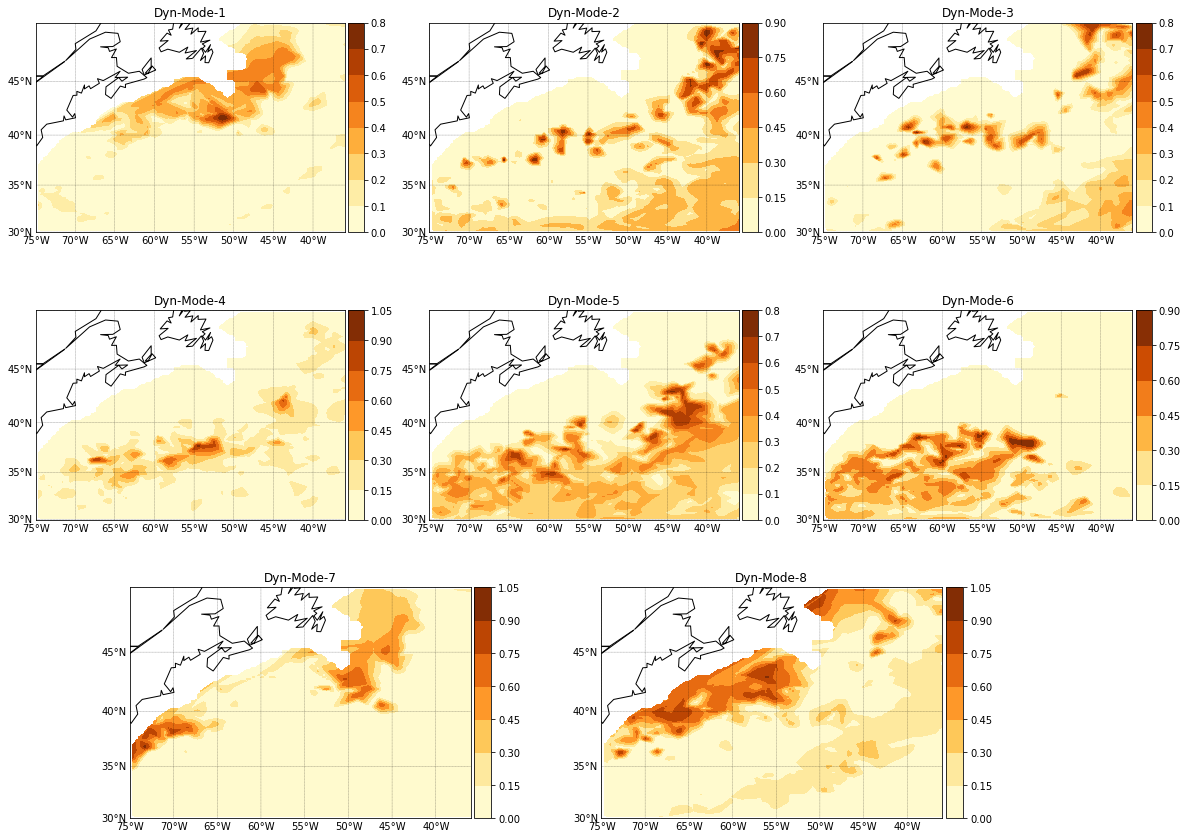

In [98]:
eval.spa_dyna_mode_dis(pi_hat_train_temp, lon_train, lat_train, 120, 120, pres_train, 400 , 500, 450, 3, map)

In [97]:
def spa_dyna_mode_dis(pi_hat, lon, lat, Nlat, Nlon, pres, h_depth,l_depth, inter_depth,neigboors, map):
    """
    Plot the spatial dynamical mode distribution between two depth levels in the ocean.
    
    Args:
    -----
    - pi_hat: the prior probabilities for dynamical modes
    - lon: ...
    - lat: ...
    - pres: infos of the pressure at each point in the ocean
    - h_depth: the higher depth level from the inter_depth
    - l_depth: the lower depth from the the inter_depth
    - inter_depth: a depth level at which we interpolate the prior dynamical modes
    - map: a basemap object
    """
    
    ## create a 2D coordinate grid
    xlat = np.linspace(min(lat),max(lat),Nlat)
    ylon = np.linspace(min(lon),max(lon),Nlon)
    
    yylon, xxlat = np.meshgrid(ylon,xlat)
    xxlat = xxlat.reshape(xxlat.shape[0]*xxlat.shape[1],1)
    yylon = yylon.reshape(xxlat.shape[0]*xxlat.shape[1],1)
    zzdepth = inter_depth*np.ones((xxlat.shape[0]*xxlat.shape[1],1))
    
    ## Extract data
    data_mask = np.where((pres >= h_depth)*(pres <= l_depth))
    extracted_priors = pi_hat[data_mask[0],:][:10000,:]
    lev_lon = lon[data_mask[0]][:10000]
    lev_lat = lat[data_mask[0]][:10000]
    lev_pres = pres[data_mask[0]][:10000]
    
    N = lev_lon.shape[0]
    features = np.concatenate((lev_lat.reshape(N,1),lev_lon.reshape(N,1),lev_pres.reshape(N,1)),axis = 1)
    points = np.concatenate((xxlat,yylon,zzdepth),axis = 1)

    ## existing data region
    mask_pres = pres < 30
    pres_under_30 = pres[mask_pres]
    lon_30 = lon[mask_pres]
    lat_30 = lat[mask_pres]
    M = extracted_priors.shape[1]
    
    # interpolation
    dyn_interpols = np.zeros((Nlat*Nlon,M))
    for dyn in tqdm(range(M), disable=False):
        dyn_interpols[:,dyn] = griddata(features,extracted_priors[:,dyn],points, rescale=True)
        dyn_interpols[np.isnan(dyn_interpols[:,dyn]),dyn] = 0
    dyn_interpols = dyn_interpols/(dyn_interpols.sum(axis =1).reshape(Nlat*Nlon,1))
  
    
    fig = plt.figure(figsize = (20,15))
    subplots_adjust(wspace=0.2, hspace=0.2)
    
    for dyn in tqdm(range(M), disable=False):
        dyn_interpol = dyn_interpols[:,dyn].reshape(Nlat,Nlon)
        
        # existing data region mask (care  only about the surface)
        mask_region = np.ones((Nlat,Nlon)) < 2
        for k in range(len(lon_30)):
            i = np.argmin(abs(xlat - lat_30[k]))
            j = np.argmin(abs(ylon - lon_30[k]))
            mask_region[i-neigboors:i+neigboors,j-neigboors:j+neigboors] = False
        # apply the mask
        dyn_interpol[mask_region] = nan
            
        cmap = 'YlOrBr'
        
        plon, plat = map(ylon, xlat)
        xxlon_,xxlat_ = meshgrid(plon,plat)

        parallels = np.arange(0.,81,5.) # lat
        meridians = np.arange(10.,351.,5.) # lon
        
        if dyn == 6:
            ax = subplot2grid((3,12), (2, 1), colspan=4)
            map.contourf(xxlon_, xxlat_, dyn_interpol, cmap = cmap)
            plt.title("Dyn-Mode-"+str(dyn+1))
            map.drawcoastlines()
            map.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.3);
            map.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.3);
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.05)
            plt.colorbar(cax=cax)
            
        elif dyn == 7:
            ax = subplot2grid((3,12), (2, 6), colspan=4)
            map.contourf(xxlon_, xxlat_, dyn_interpol, cmap = cmap)
            plt.title("Dyn-Mode-"+str(dyn+1))
            map.drawcoastlines()
            map.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.3);
            map.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.3);
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.05)
            plt.colorbar(cax=cax)
        
        else:
            plt.subplot(3,3,dyn+1)
            ax = plt.gca()
            map.contourf(xxlon_, xxlat_, dyn_interpol, cmap = cmap)
            plt.title("Dyn-Mode-"+str(dyn+1))
            map.drawcoastlines()
            map.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.3);
            map.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.3);
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.05)
            plt.colorbar(cax=cax)

https://matplotlib.org/3.1.0/tutorials/intermediate/gridspec.html

#####HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH#######

In [123]:
indexs = index_extract(399,lat_train,lon_train,juld_train,x_g_train,lat_thres = 3, lon_thres = 3, date_thres = 10000, depth_thres = 10,patch = True,)

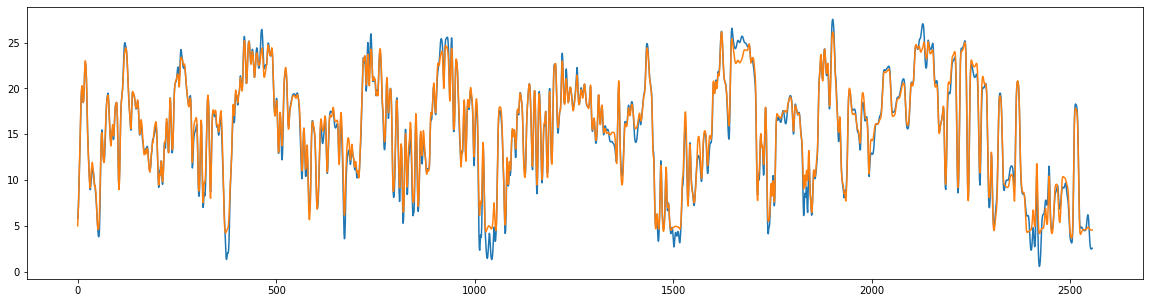

In [130]:
figure(figsize = (20,5))
local_evolu(indexs, gt_temp_train, est_temp_train, juld_train)

In [129]:
def local_evolu(indexs, gt_temps, est_temps, gt_dates):
    """
    Estimate a evolution in time of the temperature(or salanity) in a local region
    
    Args:
    - indexs: indexs of related points
    - gt_temps: the ground-truth temperature
    - est_temps: the estimated temperature
    """
    gt = gt_temps[indexs]
    est = est_temps[indexs]
    dates = gt_dates[indexs]
    
    sorted_date_indexes = np.argsort(dates)
    sorted_dates = dates[sorted_date_indexes]
    sorted_gt = gt[sorted_date_indexes]
    sorted_est = est[sorted_date_indexes]
    
    _, trend_gt = sm.tsa.filters.hpfilter(sorted_gt, 5)
    _, trend_est = sm.tsa.filters.hpfilter(sorted_est, 5)
    
    plt.plot(trend_gt)
    plt.plot(trend_est)

### Compare with evaluated data

In [9]:
from netCDF4 import Dataset

In [10]:
nc = Dataset("data_eval_s5/GL_TS_MO_41048_daily_TSmooring_Z0.0.nc")
vars_ = nc.variables

In [200]:
slas, pres = sla_pres(index, coords_g_train, X, lat_thres = 3, lon_thres =3, date_thres = 4750, depth_thres = 5, vars_ = False)

Number of data:  2581


In [277]:
indexs = p_index(vars_,lat_train,lon_train,juld_train,x_g_train,lat_thres = 3, lon_thres = 3, date_thres = 4745, depth_thres = 10,patch = True)
indexs.shape
gt_seasonal_temp_train = gt_sea_temp(indexs, gt_temp_train, juld_train)
est_seasonal_temp_train = gt_sea_temp(indexs, est_temp_train, juld_train)
ref_seasonal_temp = vars_['TEMP_SEASC'][:].data
cycle_gt, trend_gt = sm.tsa.filters.hpfilter(gt_seasonal_temp_train, 50)
cycle_est, trend_est = sm.tsa.filters.hpfilter(est_seasonal_temp_train, 50)
# plt.plot(trend_gt);
# plt.plot(trend_est);
# plt.plot(ref_seasonal_temp);

Number of data:  2926
Coordinates x: lon= -54.24 lat = 40.03 
Depth =  82.50 


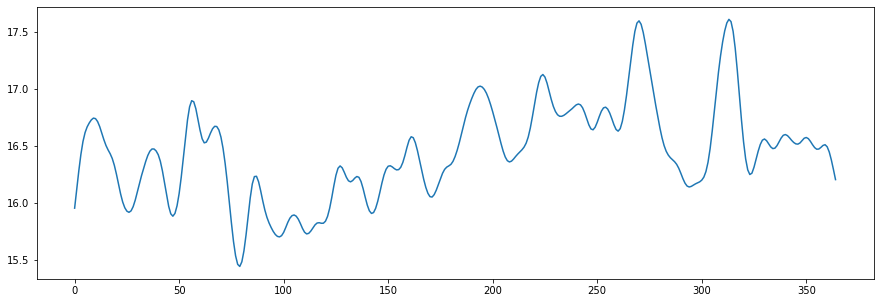

In [337]:
# index = p_index(vars_,lat_train,lon_train,juld_train,x_g_train)
index = 10000
slas, pres = sla_pres(index, coords_g_train, X, lat_thres = 3, lon_thres =3, date_thres = 4750, depth_thres = 5, vars_ = False)
priode_ = 365*5 # days
prof = profiles[index]
day_temp , tempx = follow_x_v2(index,coords_g_train,priode_,X,E8_f_x,E8_std_x,pi_hat_train_temp,E8_beta,E8_lambda_,E8_sigma,gt_temp_train,slas,pres)
tempx_avg = np.array(tempx).reshape(5,365).mean(axis = 0)
cycle, trend = sm.tsa.filters.hpfilter(tempx_avg, 50)
figure(figsize = (15,5))
plt.plot(trend);
# eval.follow_x_plot(day_temp,trend,int(prof),step = 1)

In [7]:
def follow_x_v2(index_,coords_g,priode_,X,f_x,std_x,pi_hat,beta,lambda_,sigma,gt_temp,slas_year,pres_year):
    "Following the temperature evolution of a point x"
    
    # Extract longitude, latitude ,dates
    index = index_
    latx, lonx, juldx0 = coords_g[index,0],coords_g[index,1],coords_g[index,2]
    print("Coordinates x: lon= %.2f lat = %.2f " %(lonx,latx))
    print("Depth =  %.2f "%X[index,-1])
    
    # intiate x0
    x0 = copy.deepcopy(X[index,:])
    priode = priode_
    
    tempx = []
    tempx.append(gt_temp_train[index])
    
    daysx = []
    daysx.append(juldx0)
    
    pi_hatx0 = copy.deepcopy(pi_hat[index,:])
    pi_hatx = pi_hatx0
    
    K = pi_hatx.shape[0]

    for j in range(1,priode):

        juldx = juldx0 + j

        # update date of x
        x0[1] = juldx
        x0[2] = np.sin(2*math.pi*(1/365.25)*juldx)
        x0[3] = np.cos(2*math.pi*(1/365.25)*juldx)
        
        # update sla, and pres
        jday = julian.from_jd(juldx, fmt='mjd')
        day_yer = jday.day + (jday.month -1)*30 
        x0[-2] = slas_year[day_yer]
        x0[-1] = pres_year[day_yer]

        # normalize x
        x = (x0 - f_x)/std_x

        # update prior mode probabilities of x
        p = 0
        for k in range(K):
            p += lambda_[k]*mn.pdf(tempx[j-1],x@beta[k,:,:],sigma[k,:,:])

        for k in range(K):
            pi_hatx[k]= lambda_[k]*mn.pdf(tempx[j-1],x@beta[k,:,:],sigma[k,:,:])/p

        yx = 0
        # estimate temperature
        for λ in range(pi_hatx.shape[0]):
            yx = yx + pi_hatx[λ]*x@beta[λ,:,:].ravel()

        daysx.append(juldx)
        tempx.append(yx)

    return daysx,tempx

In [8]:
def sla_pres(index, coords_g, X, lat_thres = 1, lon_thres =1, date_thres = 4750, depth_thres = 10, vars_ = False):
    
    """
    Extract seasonal variables pressure and sea level anormaly
    """
    
    if not vars_:
        lat_ref = coords_g[index,0]
        lon_ref = coords_g[index,1]
        date_ref = coords_g[index,2]
        depth_ref = X[index,-1]
    else:
        lon_ref = index['longitude'][:].data[0]
        lat_ref = index['latitude'][:].data[0]
        x_date = datetime(year=2007, month=1, day=1,
                  hour=0, minute=0, second=0, microsecond=0)
        date_ref = julian.to_jd(x_date,fmt='mjd')  - 90*365.25
        depth_ref = 0
        
        
    # find the depth mask
    depth_mask = np.abs(X[:,-1] - depth_ref) < depth_thres
    
    # find the date mask 
    jul_days = coords_g[:,-2]
    date_mask = np.abs(jul_days-date_ref) <= date_thres

    # find a point whose coordinates are nearest to the considered point
    lat = coords_g[:,0]
    lon = coords_g[:,1]
    lat_mask = np.abs(lat-lat_ref) <= lat_thres
    lon_mask = np.abs(lon-lon_ref) <= lon_thres
    
    # mask
    mask = np.where(depth_mask*lat_mask*lon_mask*date_mask)
    
    # extract sla
    slas = X[:,-2][mask]
    
    # extract pres
    pres = X[:,-1][mask]
    
    # extract date
    dates = coords_g[:,-2][mask]
    
    jdays = [julian.from_jd(x, fmt='mjd') for x in dates]
    days = np.array([x.day + (x.month -1)*30 for x in jdays])
    
    slas_in_year = np.zeros(365)
    pres_in_year = np.zeros(365)
    
    print("Number of data: ",slas.shape[0])
    
    for d in range(0,365):
#         slas_in_year[d] = slas[np.where(days == d +1)].mean()
#         pres_in_year[d] = pres[np.where(days == d +1)].mean()
        slas_in_year[d] = np.median(slas[np.where(days == d +1)])
        pres_in_year[d] = np.median(pres[np.where(days == d +1)])
        
        if np.isnan(slas_in_year[d]):
            slas_in_year[d] = slas_in_year[d-1]
        
        if np.isnan(pres_in_year[d]):
            pres_in_year[d] = pres_in_year[d-1]
            
    return slas_in_year,pres_in_year